In [1]:
#importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

In [3]:
#for linear equation y=2x+3

In [4]:
x = np.arange(-5.0, 5.0, 0.1)
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [5]:
#For cubic equation y=1*x^3+1*x^2+1*x+3

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [7]:
#for quadratic equation y=x^2

In [8]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [9]:
#for exponential equation y=1*a^x

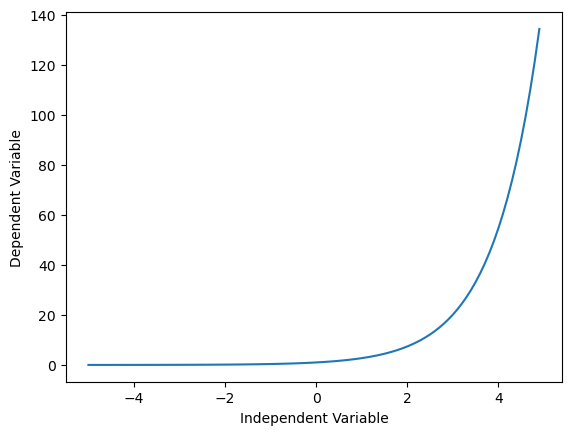

In [10]:
X = np.arange(-5.0, 5.0, 0.1)
Y= np.exp(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [11]:
#for logarithmic equation y=log(x)

In [12]:
X = np.arange(-5.0, 5.0, 0.1)
Y = np.log(X)
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

C:\Users\MADHUSUDAN\AppData\Local\Temp\ipykernel_11456\3471947836.py:2: RuntimeWarning: invalid value encountered in log
  Y = np.log(X)


In [13]:
#for sigmoid equation y=1-(4/(1+3^(x-2)))

In [14]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1-4/(1+np.power(3, X-2))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [15]:
#loading the dataset

In [16]:
df = pd.read_csv("C:/Users/MADHUSUDAN/Downloads/edX4.csv")
df.head()

Year         Value
0  1960  5.918412e+10
1  1961  4.955705e+10
2  1962  4.668518e+10
3  1963  5.009730e+10
4  1964  5.906225e+10

In [17]:
#plotting the dataset

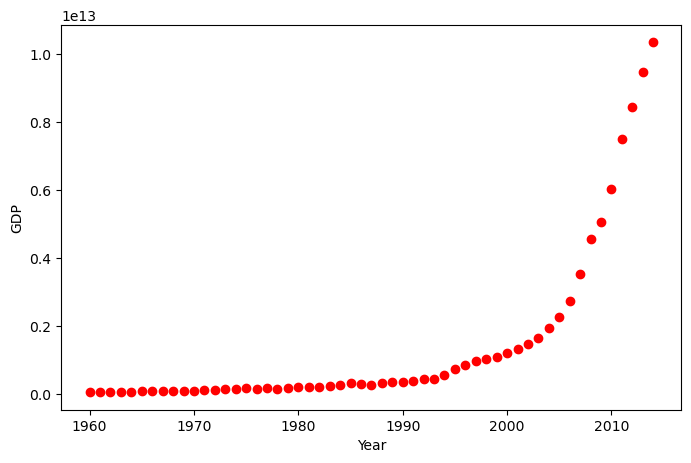

In [18]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [19]:
#choosing a model

In [20]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [21]:
#building the model

The Formula for the Logistic Function :

$$ \hat{Y} = \frac1{1+e^{-\beta_1(X-\beta_2)}}$$


In [22]:
def sigmoid(x, Beta1, Beta2):
     y = 1 / (1 + np.exp(-Beta1*(x-Beta2)))
     return y

In [23]:
beta1 = 0.10
beta2 = 1990.0
#logistic function
Y_pred = sigmoid(x_data, beta1 , beta2)

In [24]:
#plotting
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [25]:
#normalizing the data

In [26]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [27]:
#finding best parameters using curve_fit

In [28]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


In [29]:
#plotting our model

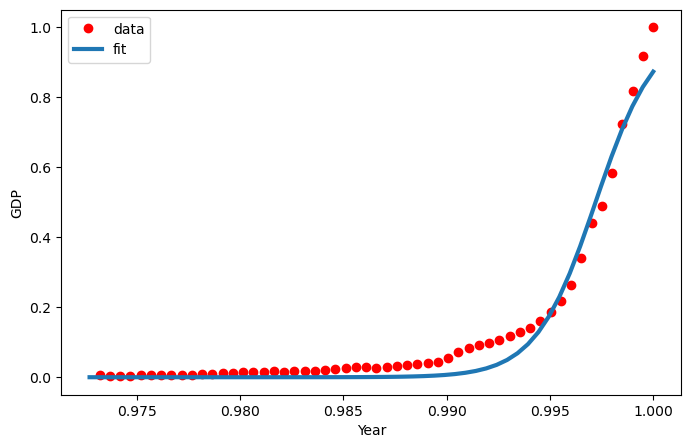

In [30]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [31]:
#train test split

In [32]:
#splitting the data
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

In [33]:
#training
popt, pcov = curve_fit(sigmoid, train_x, train_y)

In [34]:
#predicting & testing
y_hat = sigmoid(test_x, *popt)

In [35]:
#Calculations
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.97
